In [65]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc ,precision_recall_curve
import collections
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [4]:
from xgboost import XGBClassifier

In [63]:
# function to plot confusion matrix

def plot_confusion_matrix(test_y, pred_y):
    
    # calculating f1_score(micro) or accuracy
    print(f"f1_score :{metrics.f1_score(test_y, pred_y,average='micro')}")
    # calculating the number of data points that are misclassified
    print(f"Number of mis-classified points :{np.count_nonzero((pred_y- test_y))*100/test_y.shape[0]} %")

    C = metrics.confusion_matrix(test_y, pred_y)
    labels = [1,2,3,4,5,6,7,8]
    # representing in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*20, "Classification report", "-"*20)
    print(metrics.classification_report(test_y,pred_y,digits=3))
    
# function to plot precision-recall curve

def plot_precision_recall_curve(classifier,train_x,train_y,test_x,test_y,classes):
    # classes : array with the classes
    n_classes=len(classes)
    train_bin_y=label_binarize(train_y,classes)
    test_bin_y=label_binarize(test_y,classes)
    
    clf=OneVsRestClassifier(estimator=classifier)
    y_score=clf.fit(train_x,train_bin_y).predict_proba(test_x) 
    
    precision={}
    recall={}
    pr_auc={}
    for i in range(n_classes):
        precision[i], recall[i], threshpld_pr= precision_recall_curve(test_bin_y[:,i],y_score[:,i])
    
    fig, ax=plt.subplots(figsize=(16,7))
    ax.plot([0,1],[0,1],'k--')
    ax.set_xlim([0.0,1.0])
    ax.set_ylim([0.0,1.05])
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision-Recall curve')
    for i in range(n_classes):
        ax.plot(recall[i], precision[i], label='class %i' %(classes[i]))
    ax.legend(loc="best")
    ax.grid(alpha=0.4)
    sns.despine()
    plt.show()
    
# function to plot ROC 

def plot_roc(classifier,train_x,train_y,test_x,test_y,classes):
    # classes : array with the classes
    n_classes=len(classes)
    train_bin_y=label_binarize(train_y,classes)
    test_bin_y=label_binarize(test_y,classes)
    
    clf=OneVsRestClassifier(estimator=classifier)
    y_score=clf.fit(train_x,train_bin_y).predict_proba(test_x) 
    
    fpr={}
    tpr={}
    roc_auc={}
    for i in range(n_classes):
        fpr[i], tpr[i], _= roc_curve(test_bin_y[:,i],y_score[:,i])
        roc_auc[i]= auc(fpr[i],tpr[i])
    
    fig, ax=plt.subplots(figsize=(16,7))
    ax.plot([0,1],[0,1],'k--')
    ax.set_xlim([0.0,1.0])
    ax.set_ylim([0.0,1.05])
    ax.set_xlabel('false positive rate')
    ax.set_ylabel('true positive rate')
    ax.set_title('ROC')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area=%0.3f) for class %i' %(roc_auc[i],classes[i]))
    ax.legend(loc="best")
    ax.grid(alpha=0.4)
    sns.despine()
    plt.show()
    
# function to produce final result

def result(classifier, train_x, train_y, test_x, test_y, pred_y, classes):
    
    pred_train_y=classifier.predict(train_x)
    print("*"*30,"Train Set","*"*30)
    print("-"*20,"Classificarion Report","-"*20)
    print(metrics.classification_report(train_y,pred_train_y,digits=3))
    
    print("*"*30,'Evaluation on Test set',"*"*30)
    plot_confusion_matrix(test_y,pred_y)
    print("*"*30,"ROC","*"*30)
    plot_roc(classifier, train_x, train_y, test_x, test_y, classes)
    print("*"*30,'Precision-Recall curve',"*"*30)
    plot_precision_recall_curve(classifier, train_x, train_y, test_x, test_y, classes)

In [6]:
X_train = np.load('data/train/X_train.npy') 

Y_train = np.load('data/train/Y_train.npy')

X_test = np.load('data/test/set1/X_test.npy')

Y_test = np.load('data/test/set1/Y_test.npy')

X_test2 = np.load('data/test/set2/X_test2.npy')

Y_test2 = np.load('data/test/set2/Y_test2.npy')

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_test2 = scaler.fit_transform(X_test2)

In [10]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

print(X_test2.shape)
print(Y_test2.shape)

(28368, 42)
(28368,)
(12168, 42)
(12168,)
(7040, 42)
(7040,)


In [11]:
clf = XGBClassifier(objective='multi:softmax', num_class=8)

In [12]:
clf.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=8, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [14]:
pred_y=clf.predict(X_test)
print(classification_report(Y_test,pred_y))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1521
           1       0.99      0.99      0.99      1521
           2       0.95      0.98      0.96      1521
           3       0.98      0.54      0.70      1521
           4       0.99      0.99      0.99      1521
           5       0.72      0.99      0.83      1521
           6       0.82      0.71      0.76      1521
           7       1.00      1.00      1.00      1521

    accuracy                           0.90     12168
   macro avg       0.91      0.90      0.89     12168
weighted avg       0.91      0.90      0.89     12168



In [15]:
pred_y2=clf.predict(X_test2)
print(classification_report(Y_test2,pred_y2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       887
           1       0.99      1.00      0.99       883
           2       0.98      0.95      0.97       878
           3       0.96      0.83      0.89       889
           4       1.00      0.99      0.99       891
           5       0.85      0.99      0.92       873
           6       0.91      0.87      0.89       880
           7       1.00      1.00      1.00       859

    accuracy                           0.95      7040
   macro avg       0.96      0.95      0.95      7040
weighted avg       0.96      0.95      0.95      7040



## max_depth, min_child_weight

In [16]:
para1 = {'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2)}

xgb1=XGBClassifier( learning_rate =0.1, n_estimators=100, gamma=0, 
                                                subsample=0.8, colsample_bytree=0.8,
                                                objective='multi:softmax', num_class=8)
model1 = GridSearchCV(estimator = xgb1, 
                      param_grid = para1, 
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5,
                      return_train_score=True,
                      verbose=1)
model1.fit(X_train,Y_train)
print(f"best parameters: {model1.best_params_}")
print(f"best score: {model1.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 13.3min finished


best parameters: {'max_depth': 5, 'min_child_weight': 1}
best score: 0.9988014763735313


## gamma

In [20]:
para2 = {'gamma':[i/10.0 for i in range(0,5)]}

xgb2=XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
                                                min_child_weight=1, 
                                                subsample=0.8, colsample_bytree=0.8,
                                                objective='multi:softmax', num_class=8)
model2 = GridSearchCV(estimator = xgb2, 
                      param_grid = para2, 
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5,
                      return_train_score=True,
                      verbose=1)
model2.fit(X_train,Y_train)
print(f"best parameters: {model2.best_params_}")
print(f"best score: {model2.best_score_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.2min finished


best parameters: {'gamma': 0.0}
best score: 0.9988014763735313


## subsample, colsample_bytree

In [21]:
para3 = {'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)]}

xgb3=XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
                                                min_child_weight=1, gamma=0 ,
                                                objective='multi:softmax', num_class=8)
model3 = GridSearchCV(estimator = xgb3, 
                      param_grid = para3, 
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5,
                      return_train_score=True,
                      verbose=1)
model3.fit(X_train,Y_train)
print(f"best parameters: {model3.best_params_}")
print(f"best score: {model3.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 16.9min finished


best parameters: {'colsample_bytree': 0.7, 'subsample': 0.6}
best score: 0.9988719795907881


## Regularization 

In [22]:
para4 = { 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

xgb4=XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
                                                min_child_weight=1, gamma=0,
                                                subsample=0.6, colsample_bytree=0.7,
                                                objective='multi:softmax', num_class=8)
model4 = GridSearchCV(estimator = xgb4, 
                      param_grid = para4, 
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5,
                      return_train_score=True,
                      verbose=1)
model4.fit(X_train,Y_train)
print(f"best parameters: {model4.best_params_}")
print(f"best score: {model4.best_score_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.7min finished


best parameters: {'reg_alpha': 0.01}
best score: 0.9989072280927267


## Learning rate n_estimators

In [23]:
para5 = {'n_estimators':[100,200,500],'learning_rate':[0.05,0.1,0,2]}

xgb5=XGBClassifier(max_depth=5,
                   min_child_weight=1, gamma=0,
                   reg_alpha=0.01,
                   subsample=0.6, colsample_bytree=0.7,
                   objective='multi:softmax', num_class=8)
model5 = GridSearchCV(estimator = xgb5, 
                      param_grid = para5, 
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5,
                      return_train_score=True,
                      verbose=1)
model5.fit(X_train,Y_train)
print(f"best parameters: {model5.best_params_}")
print(f"best score: {model5.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 21.6min finished


best parameters: {'learning_rate': 0.1, 'n_estimators': 500}
best score: 0.999189228534995


In [60]:
final_model=XGBClassifier(learning_rate=0.1,
                          n_estimators=500,
                          max_depth=5,
                          min_child_weight=1, gamma=0,
                          reg_alpha=0.01, n_jobs=-1,
                          subsample=0.6, colsample_bytree=0.7,
                          objective='multi:softmax', num_class=8)
final_model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, num_class=8, objective='multi:softprob',
              random_state=0, reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.6, verbosity=1)

In [61]:
final_pred1 = final_model.predict(X_test)
final_pred2 = final_model.predict(X_test2)

****************************** Train Set ******************************
-------------------- Classificarion Report --------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3546
           1      1.000     1.000     1.000      3546
           2      1.000     1.000     1.000      3546
           3      1.000     1.000     1.000      3546
           4      1.000     1.000     1.000      3546
           5      1.000     1.000     1.000      3546
           6      1.000     1.000     1.000      3546
           7      1.000     1.000     1.000      3546

    accuracy                          1.000     28368
   macro avg      1.000     1.000     1.000     28368
weighted avg      1.000     1.000     1.000     28368

****************************** Evaluation on Test set ******************************
f1_score :0.9227481919789612
Number of mis-classified points :7.725180802103879 %
-------------------- Confusion matrix --------

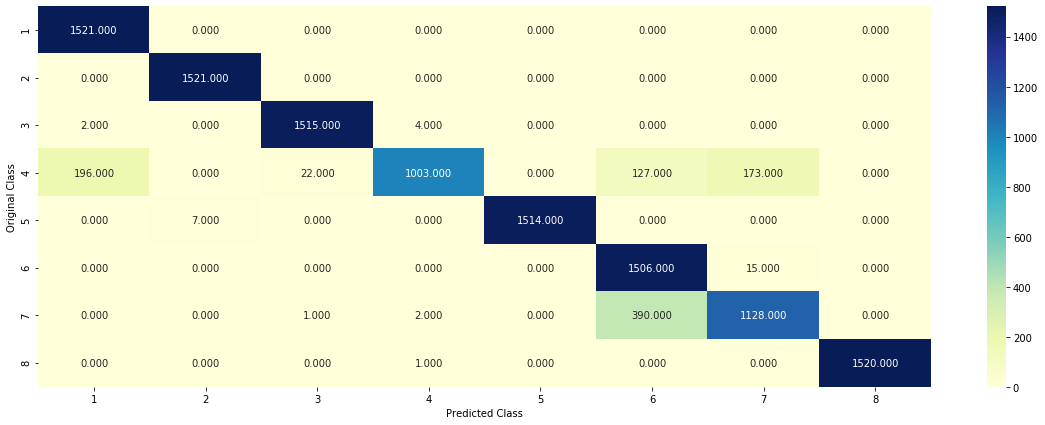

-------------------- Classification report --------------------
              precision    recall  f1-score   support

           0      0.885     1.000     0.939      1521
           1      0.995     1.000     0.998      1521
           2      0.985     0.996     0.991      1521
           3      0.993     0.659     0.793      1521
           4      1.000     0.995     0.998      1521
           5      0.744     0.990     0.850      1521
           6      0.857     0.742     0.795      1521
           7      1.000     0.999     1.000      1521

    accuracy                          0.923     12168
   macro avg      0.932     0.923     0.920     12168
weighted avg      0.932     0.923     0.920     12168

****************************** ROC ******************************


C:\anaconda\envs\PratikEnv\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
C:\anaconda\envs\PratikEnv\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


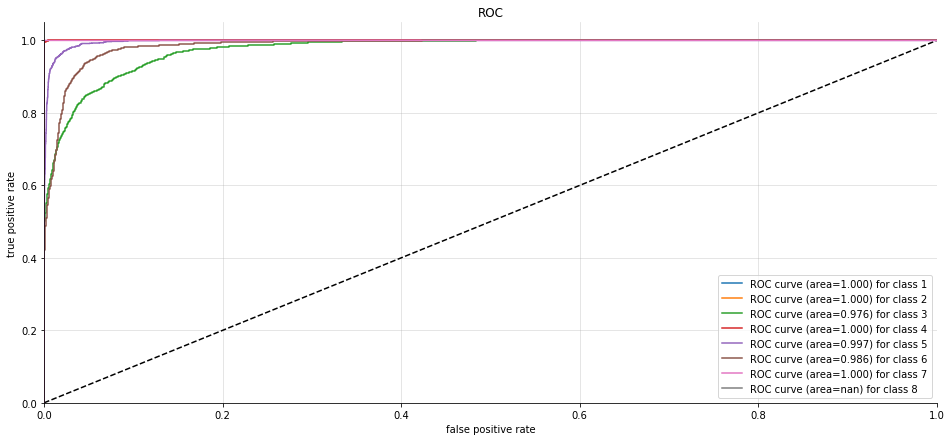

****************************** Precision-Recall curve ******************************


C:\anaconda\envs\PratikEnv\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
C:\anaconda\envs\PratikEnv\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


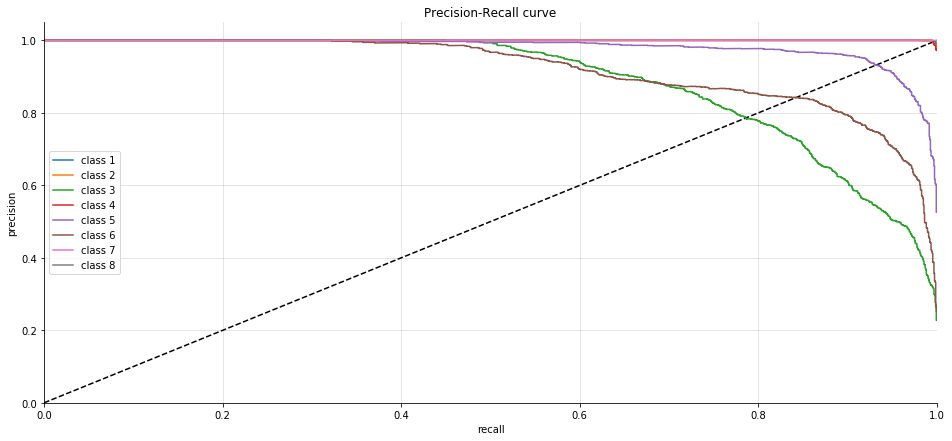

In [66]:
result(classifier=final_model, 
       train_x=X_train, 
       train_y=Y_train, 
       test_x=X_test, 
       test_y=Y_test, 
       pred_y=final_pred1, 
       classes=[1,2,3,4,5,6,7,8])

****************************** Train Set ******************************
-------------------- Classificarion Report --------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3546
           1      1.000     1.000     1.000      3546
           2      1.000     1.000     1.000      3546
           3      1.000     1.000     1.000      3546
           4      1.000     1.000     1.000      3546
           5      1.000     1.000     1.000      3546
           6      1.000     1.000     1.000      3546
           7      1.000     1.000     1.000      3546

    accuracy                          1.000     28368
   macro avg      1.000     1.000     1.000     28368
weighted avg      1.000     1.000     1.000     28368

****************************** Evaluation on Test set ******************************
f1_score :0.9623579545454546
Number of mis-classified points :3.7642045454545454 %
-------------------- Confusion matrix -------

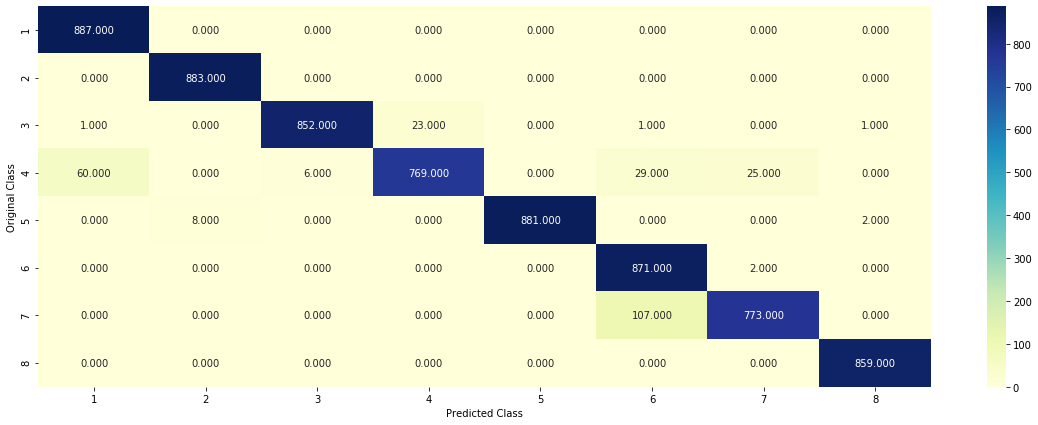

-------------------- Classification report --------------------
              precision    recall  f1-score   support

           0      0.936     1.000     0.967       887
           1      0.991     1.000     0.995       883
           2      0.993     0.970     0.982       878
           3      0.971     0.865     0.915       889
           4      1.000     0.989     0.994       891
           5      0.864     0.998     0.926       873
           6      0.966     0.878     0.920       880
           7      0.997     1.000     0.998       859

    accuracy                          0.962      7040
   macro avg      0.965     0.963     0.962      7040
weighted avg      0.965     0.962     0.962      7040

****************************** ROC ******************************


C:\anaconda\envs\PratikEnv\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
C:\anaconda\envs\PratikEnv\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


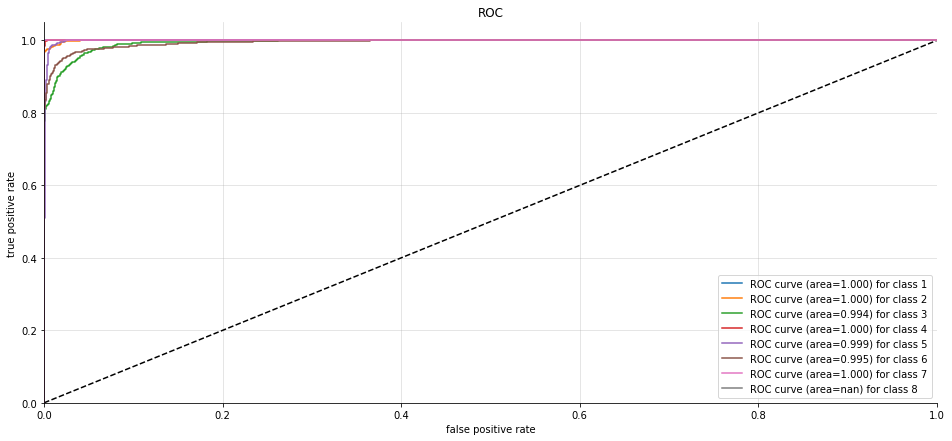

****************************** Precision-Recall curve ******************************


C:\anaconda\envs\PratikEnv\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
C:\anaconda\envs\PratikEnv\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


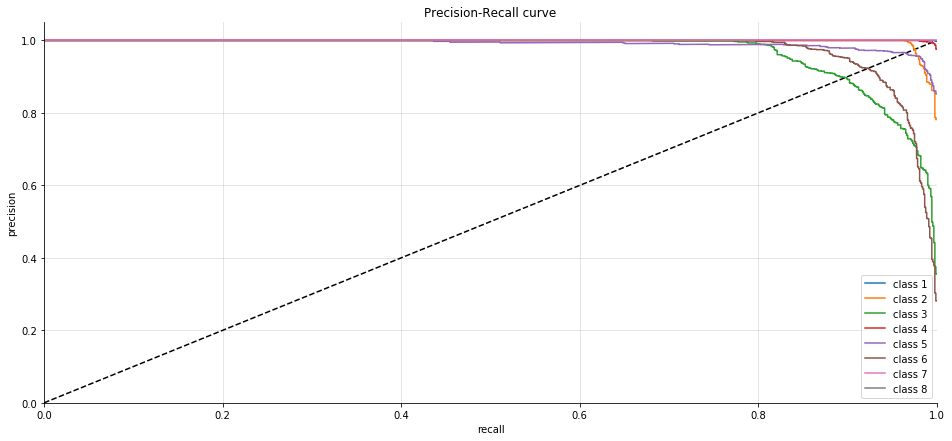

In [67]:
result(classifier=final_model, 
       train_x=X_train, 
       train_y=Y_train, 
       test_x=X_test2, 
       test_y=Y_test2, 
       pred_y=final_pred2, 
       classes=[1,2,3,4,5,6,7,8])

In [75]:
final_model2=XGBClassifier(learning_rate=0.1,
                          n_estimators=1000,
                          max_depth=5,
                          min_child_weight=1, gamma=0,
                          reg_alpha=0.01, n_jobs=-1,
                          subsample=0.5, colsample_bytree=0.6,
                          objective='multi:softmax', num_class=8)
final_model2.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, num_class=8, objective='multi:softprob',
              random_state=0, reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.5, verbosity=1)

In [76]:
final_pred11 = final_model2.predict(X_test)
final_pred22 = final_model2.predict(X_test2)

print(f1_score(final_pred11, Y_test,average='micro'))
print(f1_score(final_pred22, Y_test2,average='micro'))

0.9287475345167653
0.9646306818181818


In [77]:
final_model2=XGBClassifier(learning_rate=0.1,
                          n_estimators=1000,
                          max_depth=5,
                          min_child_weight=1, gamma=0,
                          reg_alpha=0.01, n_jobs=-1,
                          subsample=0.5, colsample_bytree=0.5,
                          objective='multi:softmax', num_class=8)
final_model2.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, num_class=8, objective='multi:softprob',
              random_state=0, reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.5, verbosity=1)

In [78]:
final_pred11 = final_model2.predict(X_test)
final_pred22 = final_model2.predict(X_test2)

print(f1_score(final_pred11, Y_test,average='micro'))
print(f1_score(final_pred22, Y_test2,average='micro'))

0.9315417488494412
0.9664772727272727


In [90]:
final_model2=XGBClassifier(learning_rate=0.1,
                          n_estimators=1000,
                          max_depth=5,
                          min_child_weight=1, gamma=0,
                          reg_alpha=0.01, n_jobs=-1,
                          subsample=0.5, colsample_bytree=0.5,
                          objective='multi:softmax', num_class=8)
final_model2.fit(X_train,Y_train)

final_pred11 = final_model2.predict(X_test)
final_pred22 = final_model2.predict(X_test2)

print(f1_score(final_pred11, Y_test,average='micro'))
print(f1_score(final_pred22, Y_test2,average='micro'))

0.915680473372781
0.959659090909091
